<span style="font-size:18px; color:red;">Elemento de pórtico - 3D</span>


In [334]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import plotly.graph_objects as go

In [335]:
x = sp.Symbol('x')

In [336]:
matriz_de_compatibilidade = [[1, 2], [2, 3], [4, 3], [5, 4], [6, 5], [7, 6], [7, 8], [8, 9], [6, 9], [10, 1], [10, 11], [12, 11], [4, 12], [4, 13], [13, 14], [12, 14],
                             [5, 12], [9, 5], [15, 2], [3, 16], [4, 16], [15, 4], [1, 15], [1, 5], [5, 17], [17, 7], [18, 7], [18, 19], [20, 19], [19, 6], [9, 19],
                             [9, 17], [8, 17], [21, 8], [21, 9], [8, 18], [6, 1], [10, 6], [12, 10], [11, 15], [11, 22], [23, 22], [14, 23], [1, 4], [11, 1], [11, 23],
                             [16, 13], [17, 12], [22, 15], [15, 16], [17, 10], [7, 10], [19, 7], [19, 21], [24, 8], [13, 22], [13, 11], [12, 13]]


matriz_de_coordenadas = [[142.5, 855.0, -142.5],[427.5, 1140.0, -142.5],[427.5, 1140.0, 142.5],[142.5, 855.0, 142.5],[142.5, 570.0, 142.5],[142.5, 570.0, -142.5], 
                         [-142.5, 285.0, -142.5],[-142.5, 285.0, 142.5],[142.5, 285.0, 142.5],[-142.5, 570.0, -142.5],[-142.5, 855.0, -142.5],[-142.5, 855.0, 142.5], 
                         [-142.5, 1140.0, 142.5],[-427.5, 1140.0, 142.5],[142.5, 1140.0, -142.5],[142.5, 1140.0, 142.5],[-142.5, 570.0, 142.5],[-142.5, 0.0, -142.5], 
                         [142.5, 285.0, -142.5],[142.5, 0.0, -142.5],[142.5, 0.0, 142.5],[-142.5, 1140.0, -142.5],[-427.5, 1140.0, -142.5],[-142.5, 0.0, 142.5]]

In [337]:
numero_de_nos = len(matriz_de_coordenadas)
numero_de_elementos = len(matriz_de_compatibilidade)

nos_de_interpolacao = 3
dist = 0.5

unidade = 'milimetro'

dimensao = 2 # não alterar
dimensao_global = 3 # não alterar
graus_de_liberdade_por_nó = 6

força_nos = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0] # 0 se não há força aplicada, 1 se há
forca_nos_3D = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,-20000,0],[0,0,0]] # [direção X, direção Y, direção Z]

momentos_nos = [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # 0 se não há momento aplicado, 1 se há
momentos_nos_3D = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[1000,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]] # [direção X, direção Y, direção Z]

condicoes_de_contorno_moveis = sp.Matrix([[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[0,0,0,0,0,0],[1,1,1,1,1,1],[0,0,0,0,0,0],[0,0,0,0,0,0],[1,1,1,1,1,1],[1,1,1,1,1,1],[0,0,0,0,0,0]]) # 0 para fixo, 1 para móvel

ρ = [1e-20] * numero_de_elementos # massa específica do elemento

g = 0 # módulo da gravidade local

W = sp.Matrix([[0]*numero_de_elementos, [0]*numero_de_elementos, [0]*numero_de_elementos]) # carga distribuída no sistema de coordenadas do elemento

E = [200e6] * numero_de_elementos

G = [76.92e6] * numero_de_elementos

A = [78.5398] * numero_de_elementos

J = [981.747] * numero_de_elementos

Iz = [490.87375] * numero_de_elementos
Iy = [490.87375] * numero_de_elementos

Fator_de_escala = 8 # apenas para visualização dos deslocamentos

In [338]:
def plot_reta_continua(matriz_de_compatibilidade, matriz_de_coordenadas, forca_nos_3D, momentos_nos_3D):
    fig = go.Figure()

    if 'metro' in unidade:
        tolerancia = 1
    if 'milimetro' in unidade:
        tolerancia = 100

    x_min = np.min(np.array(matriz_de_coordenadas)[:, 0]-tolerancia)
    x_max = np.max(np.array(matriz_de_coordenadas)[:, 0]+tolerancia)
    y_min = np.min(np.array(matriz_de_coordenadas)[:, 1]-tolerancia)
    y_max = np.max(np.array(matriz_de_coordenadas)[:, 1]+tolerancia)
    z_min = np.min(np.array(matriz_de_coordenadas)[:, 2]-tolerancia)
    z_max = np.max(np.array(matriz_de_coordenadas)[:, 2]+tolerancia)

    range_maximo = max(x_max - x_min, y_max - y_min, z_max - z_min)

    escala_x = (((x_max-x_min)/range_maximo))*100
    escala_y = (((y_max-y_min)/range_maximo))*100
    escala_z = (((z_max-z_min)/range_maximo))*100

    escala_total = max(escala_x, escala_y, escala_z)

    if 'metro' in unidade:
        escala_total = escala_total*0.01
    if 'milimetro' in unidade:
        escala_total = 100*escala_total

        fig.add_trace(go.Scatter3d(x=[np.nan], y=[np.nan], z=[np.nan], mode='markers', marker=dict(color='orange', size=10, symbol='circle'), name='Cargas concentradas', showlegend=True, hoverinfo='none'))
    fig.add_trace(go.Scatter3d(x=[np.nan], y=[np.nan], z=[np.nan], mode='markers', marker=dict(color='lime', size=10, symbol='circle'), name='Momentos concentrados', showlegend=True, hoverinfo='none'))
    fig.add_trace(go.Scatter3d(x=[np.nan], y=[np.nan], z=[np.nan], mode='markers', marker=dict(color='purple', size=10, symbol='circle'), name='Cargas distribuídas', showlegend=True, hoverinfo='none'))
    fig.add_trace(go.Scatter3d(x=[np.nan], y=[np.nan], z=[np.nan], mode='markers', marker=dict(color='blue', size=10, symbol='diamond-open'), name='Restrição de translação', showlegend=True, hoverinfo='none'))
    fig.add_trace(go.Scatter3d(x=[np.nan], y=[np.nan], z=[np.nan], mode='markers', marker=dict(color='red', size=10, symbol='diamond-open'), name='Restrição de rotação', showlegend=True, hoverinfo='none'))

    for k in range(len(matriz_de_compatibilidade)):
        i = matriz_de_compatibilidade[k][0] - 1  
        j = matriz_de_compatibilidade[k][1] - 1
        
        x = [matriz_de_coordenadas[i][0], matriz_de_coordenadas[j][0]]
        y = [matriz_de_coordenadas[i][1], matriz_de_coordenadas[j][1]]
        z = [matriz_de_coordenadas[i][2], matriz_de_coordenadas[j][2]]
        
        fig.add_trace(go.Scatter3d(x=x,y=y,z=z,mode='lines',line=dict(color='black', width=4),name=f'Elemento {k+1}',showlegend=False,hoverinfo='name'))

    for i in range(len(forca_nos_3D)):
        if any(forca_nos_3D[i]) != 0:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='orange', size=5, symbol='circle'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))

    for i in range(len(momentos_nos_3D)):
        if any(momentos_nos_3D[i]) != 0:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='lime', size=5, symbol='circle'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))
    
    for j in range(dimensao_global):
        for i in range(numero_de_elementos):
            no1 = matriz_de_compatibilidade[i][0]
            no2 = matriz_de_compatibilidade[i][1]
            if np.array(W)[j][i] != 0:
                fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[no1-1][0]],y=[matriz_de_coordenadas[no1-1][1]],z=[matriz_de_coordenadas[no1-1][2]],mode='markers',marker=dict(color='purple', size=5, symbol='circle'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))
                fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[no2-1][0]],y=[matriz_de_coordenadas[no2-1][1]],z=[matriz_de_coordenadas[no2-1][2]],mode='markers',marker=dict(color='purple', size=5, symbol='circle'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))


    for i in range(numero_de_nos):
        if np.array(condicoes_de_contorno_moveis)[i][0] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]-0.25*escala_total],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='blue', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))
        if np.array(condicoes_de_contorno_moveis)[i][1] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]-0.25*escala_total],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='blue', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))            
        if np.array(condicoes_de_contorno_moveis)[i][2] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]-0.25*escala_total],mode='markers',marker=dict(color='blue', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))    
        if np.array(condicoes_de_contorno_moveis)[i][3] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]-0.75*escala_total],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='red', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))
        if np.array(condicoes_de_contorno_moveis)[i][4] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]-0.75*escala_total],z=[matriz_de_coordenadas[i][2]],mode='markers',marker=dict(color='red', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))            
        if np.array(condicoes_de_contorno_moveis)[i][5] != 1:
            fig.add_trace(go.Scatter3d(x=[matriz_de_coordenadas[i][0]],y=[matriz_de_coordenadas[i][1]],z=[matriz_de_coordenadas[i][2]-0.75*escala_total],mode='markers',marker=dict(color='red', size=5, symbol='diamond-open'),name=f'Nó {i+1}',showlegend=False,hoverinfo='name'))    
    

    fig.update_layout(scene=dict(xaxis=dict(range=[x_min, x_min+range_maximo], title='X'),yaxis=dict(range=[y_min, y_min+range_maximo], title='Y'),zaxis=dict(range=[z_min, z_min+range_maximo], title='Z'),aspectmode='cube'),margin=dict(l=0, r=0, b=0, t=0))

    fig.show()

plot_reta_continua(matriz_de_compatibilidade, matriz_de_coordenadas, forca_nos_3D, momentos_nos_3D)



In [339]:
x,y,z = [],[],[]

for k in range(numero_de_elementos):
        i = matriz_de_compatibilidade[k][0]
        j= matriz_de_compatibilidade[k][1]
        
        x.append(matriz_de_coordenadas[i-1][0])
        x.append(matriz_de_coordenadas[j-1][0])
        y.append(matriz_de_coordenadas[i-1][1])
        y.append(matriz_de_coordenadas[j-1][1])
        z.append(matriz_de_coordenadas[i-1][2])
        z.append(matriz_de_coordenadas[j-1][2])

In [340]:
CXx_vec, CYx_vec, CZx_vec, CXy_vec, CYy_vec, CZy_vec, CXz_vec, CYz_vec, CZz_vec, D, L = [],[],[],[],[],[],[],[],[],[],[]

R_local_para_global = []

for i in range(numero_de_elementos):
    L.append(np.sqrt((x[2*i+1]-x[2*i])**2 + (y[2*i+1]-y[2*i])**2 + (z[2*i+1]-z[2*i])**2))
    if (x[2*i] == x[2*i+1]) and (y[2*i] == y[2*i+1]):
        if z[2*i+1] > z[2*i]:
            R_local = [[0,0,1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[-1,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0],[0,0,0,-1,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,-1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,-1,0,0]]
            CXx=0
            CXx_vec.append(CXx)
            CYx=0
            CYx_vec.append(CYx)
            CZx=1
            CZx_vec.append(CZx)
            D=np.sqrt(CXx**2 + CYx**2)
            CXy=0
            CXy_vec.append(CXy)
            CYy=1
            CYy_vec.append(CYy)
            CZy=0
            CZy_vec.append(CZy)
            CXz=-1
            CXz_vec.append(CXz)
            CYz=0
            CYz_vec.append(CYz)
            CZz=0
            CZz_vec.append(CZz)
        else:
            R_local = [[0,0,-1,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,0,0],[1,0,0,0,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,-1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0],[0,0,0,1,0,0,0,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,-1,0,0,0],[0,0,0,0,0,0,0,1,0,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0],
                               [0,0,0,0,0,0,0,0,0,0,0,-1],[0,0,0,0,0,0,0,0,0,0,1,0],[0,0,0,0,0,0,0,0,0,1,0,0]]
            CXx=0
            CXx_vec.append(CXx)
            CYx=0
            CYx_vec.append(CYx)
            CZx=-1
            CZx_vec.append(CZx)
            D=np.sqrt(CXx**2 + CYx**2)
            CXy=0
            CXy_vec.append(CXy)
            CYy=1
            CYy_vec.append(CYy)
            CZy=0
            CZy_vec.append(CZy)
            CXz=1
            CXz_vec.append(CXz)
            CYz=0
            CYz_vec.append(CYz)
            CZz=0
            CZz_vec.append(CZz)
    else:
        CXx=(x[2*i+1]-x[2*i])/L[i]
        CXx_vec.append(CXx)
        CYx=(y[2*i+1]-y[2*i])/L[i]
        CYx_vec.append(CYx)
        CZx=(z[2*i+1]-z[2*i])/L[i]
        CZx_vec.append(CZx)
        D=np.sqrt(CXx**2 + CYx**2)
        CXy=-CYx/D
        CXy_vec.append(CXy)
        CYy=CXx/D
        CYy_vec.append(CYy)
        CZy=0
        CZy_vec.append(CZy)
        CXz=-CXx*CZx/D
        CXz_vec.append(CXz)
        CYz=-CYx*CZx/D
        CYz_vec.append(CYz)
        CZz=D
        CZz_vec.append(CZz)

        R_local = [[CXx,CYx,CZx,0,0,0,0,0,0,0,0,0],[CXy,CYy,CZy,0,0,0,0,0,0,0,0,0],[CXz,CYz,CZz,0,0,0,0,0,0,0,0,0],
                           [0,0,0,CXx,CYx,CZx,0,0,0,0,0,0],[0,0,0,CXy,CYy,CZy,0,0,0,0,0,0],[0,0,0,CXz,CYz,CZz,0,0,0,0,0,0],
                           [0,0,0,0,0,0,CXx,CYx,CZx,0,0,0],[0,0,0,0,0,0,CXy,CYy,CZy,0,0,0],[0,0,0,0,0,0,CXz,CYz,CZz,0,0,0],
                           [0,0,0,0,0,0,0,0,0,CXx,CYx,CZx],[0,0,0,0,0,0,0,0,0,CXy,CYy,CZy],[0,0,0,0,0,0,0,0,0,CXz,CYz,CZz]]
        
    R_local_para_global.append(R_local)

In [341]:
x = sp.symbols('x')
carga_x, carga_y, carga_z, peso_distribuido, centroide_carga_x, centroide_carga_y, centroide_carga_z, centroide_peso = [], [], [], [], [], [], [], []

for i in range(numero_de_elementos):
    carga_x.append(sp.integrate(W[0,i], (x, 0, L[i])))
    carga_y.append(sp.integrate(W[1,i], (x, 0, L[i])))
    carga_z.append(sp.integrate(W[2,i], (x, 0, L[i])))
    peso_distribuido.append(sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))

    centroide_carga_x.append(sp.integrate(W[0,i]*x, (x, 0, L[i]))/sp.integrate(W[0,i], (x, 0, L[i])))
    centroide_carga_y.append(sp.integrate(W[1,i]*x, (x, 0, L[i]))/sp.integrate(W[1,i], (x, 0, L[i])))
    centroide_carga_z.append(sp.integrate(W[2,i]*x, (x, 0, L[i]))/sp.integrate(W[2,i], (x, 0, L[i])))
    centroide_peso.append(sp.integrate(ρ[i]*A[i]*g*x, (x, 0, L[i]))/sp.integrate(ρ[i]*A[i]*g, (x, 0, L[i])))

R1x, R1y, R1z, R1p, R2x, R2y, R2z, R2p = sp.symbols('R1x R1y R1z R1p R2x R2y R2z R2p')
R1x_vec, R1y_vec, R1z_vec, R1_peso_vec, R2x_vec, R2y_vec, R2z_vec, R2_peso_vec = [], [], [], [], [], [], [], []

if np.all(W == 0):
    carga_valor = False
else:
    carga_valor = True

if carga_valor == True:
    for k in range(numero_de_elementos):
        if W[0,k] != 0:
            equilibrio_x = sp.Eq(R1x + R2x, carga_x[k])
            equilibrio_momento = sp.Eq(-R1x*L[k]+carga_x[k]*(L[k]-centroide_carga_x[k]), 0)
            solucao = sp.solve([equilibrio_x, equilibrio_momento], (R1x, R2x))
            R1x_vec.append(solucao[R1x])
            R2x_vec.append(solucao[R2x])
        else:
            R1x_vec.append(0)
            R2x_vec.append(0)

        if W[1,k] != 0:
            equilibrio_y = sp.Eq(R1y + R2y, carga_y[k])
            equilibrio_momento = sp.Eq(-R1y*L[k]+carga_y[k]*(L[k]-centroide_carga_y[k]), 0)
            solucao = sp.solve([equilibrio_y, equilibrio_momento], (R1y, R2y))
            R1y_vec.append(solucao[R1y])
            R2y_vec.append(solucao[R2y])
        
        else:
            R1y_vec.append(0)
            R2y_vec.append(0)

        if W[2,k] != 0:
            equilibrio_z = sp.Eq(R1z + R2z, carga_z[k])
            equilibrio_momento = sp.Eq(-R1z*L[k]+carga_z[k]*(L[k]-centroide_carga_z[k]), 0)
            solucao = sp.solve([equilibrio_z, equilibrio_momento], (R1z, R2z))
            R1z_vec.append(solucao[R1z])
            R2z_vec.append(solucao[R2z])
        
        else:
            R1z_vec.append(0)
            R2z_vec.append(0)

elif carga_valor == False:
    R1x_vec = np.zeros(numero_de_elementos)
    R2x_vec = np.zeros(numero_de_elementos)

    R1y_vec = np.zeros(numero_de_elementos)
    R2y_vec = np.zeros(numero_de_elementos)

    R1z_vec = np.zeros(numero_de_elementos)
    R2z_vec = np.zeros(numero_de_elementos)

if g != 0:
    for k in range(numero_de_elementos):
        equilibrio_vertical_peso = sp.Eq(R1p + R2p, peso_distribuido[k])
        equilibrio_momento_peso = sp.Eq(-R1p*L[k]+peso_distribuido[k]*(L[k]-centroide_peso[k]), 0)
        solucao_peso = sp.solve([equilibrio_vertical_peso, equilibrio_momento_peso], (R1p, R2p))
        R1_peso_vec.append(solucao_peso[R1p])
        R2_peso_vec.append(solucao_peso[R2p])

elif g == 0:
    R1_peso_vec = np.zeros(numero_de_elementos)
    R2_peso_vec = np.zeros(numero_de_elementos)

In [342]:
Fx_sistema_global, Fy_sistema_global, Fz_sistema_global = np.zeros(numero_de_nos), np.zeros(numero_de_nos), np.zeros(numero_de_nos)
Fx_sistema_calculo_1, Fx_sistema_calculo_2, Fy_sistema_calculo_1, Fy_sistema_calculo_2, Fz_sistema_calculo_1, Fz_sistema_calculo_2, R_final =  [], [], [], [], [], [], []
R_total = np.zeros([numero_de_elementos, 2*graus_de_liberdade_por_nó])

for i in range(numero_de_elementos):
    R_total[i][0] = R1x_vec[i]+(L[i]*float(W[0,i])/2)
    R_total[i][1] = R1y_vec[i]
    R_total[i][2] = R1z_vec[i]
    R_total[i][3] = 0
    R_total[i][4] = 0
    R_total[i][5] = 0
    R_total[i][6] = R2x_vec[i]+(L[i]*float(W[0,i])/2)
    R_total[i][7] = R2y_vec[i]
    R_total[i][8] = R2z_vec[i]
    R_total[i][9] = 0
    R_total[i][10] = 0
    R_total[i][11] = 0

for i in range(numero_de_elementos):
    R_final.append(np.matmul(R_total[i],R_local_para_global[i]))

for i in range(numero_de_elementos):
    Fx_sistema_calculo_1.append(R_final[i][0])
    Fx_sistema_calculo_2.append(R_final[i][6])
    Fy_sistema_calculo_1.append(R_final[i][1])
    Fy_sistema_calculo_2.append(R_final[i][7])
    Fz_sistema_calculo_1.append(R_final[i][2])
    Fz_sistema_calculo_2.append(R_final[i][8])

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][0]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_1[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_1[i]
    Fz_sistema_global[k-1] += Fz_sistema_calculo_1[i]

for i in range(numero_de_elementos):
    k = matriz_de_compatibilidade[i][1]
    Fx_sistema_global[k-1] += Fx_sistema_calculo_2[i]
    Fy_sistema_global[k-1] += Fy_sistema_calculo_2[i]
    Fz_sistema_global[k-1] += Fz_sistema_calculo_2[i]
    

In [343]:
vetores_de_força, vetores_de_deslocamento, vetores_de_deslocamento_editavel_1 = [],[],[]
   
for _ in range(numero_de_elementos):
    u = np.array([sp.symbols(f"u{i}") for i in range(1, graus_de_liberdade_por_nó*(numero_de_nos+1))])
    d = np.array([sp.symbols(f"d{i}") for i in range(1, graus_de_liberdade_por_nó*(numero_de_nos+1))])

    vetores_de_deslocamento_editavel_1.append(d)
    vetores_de_deslocamento.append(u)

f = (np.array([sp.symbols(f"f{i}") for i in range(1, numero_de_nos+1)]))
M = (np.array([sp.symbols(f"M{i}") for i in range(1, numero_de_nos+1)]))

for k in range(len(força_nos)):
    if força_nos[k] != 0:
        f[k] = força_nos[k]

for k in range(len(momentos_nos)):
    if momentos_nos[k] != 0:
        M[k] = momentos_nos[k] 

vetores_de_força, vetores_de_momento = f, M

for i, j in zip(range(0,numero_de_elementos), range(0,numero_de_elementos)):
    for k in range(0,2):
        vetores_de_deslocamento_editavel_1[i][k] = condicoes_de_contorno_moveis[matriz_de_compatibilidade[j][k]-1]

for i in range(0, numero_de_elementos):
    for k in range(1,graus_de_liberdade_por_nó*(numero_de_nos+1)):
        if k != matriz_de_compatibilidade[i][0] and k != matriz_de_compatibilidade[i][1]: 
            vetores_de_deslocamento[i][k-1] = 0

In [344]:
matriz_total_local = []

vetor_de_deslocamento_finais = np.zeros(numero_de_nos * graus_de_liberdade_por_nó)

matrizes_de_rigidez, matrizes_de_rigidez_simbolicas = np.zeros([2*graus_de_liberdade_por_nó, 2*graus_de_liberdade_por_nó]), [] 

for i in range(numero_de_elementos):

    matriz = [[E[i]*A[i]/L[i], 0, 0, 0, 0, 0, -E[i]*A[i]/L[i], 0, 0, 0, 0, 0],
              [0, 12*E[i]*Iz[i]/(L[i])**3, 0, 0, 0, 6*E[i]*Iz[i]/(L[i])**2, 0, -12*E[i]*Iz[i]/(L[i])**3, 0, 0, 0, 6*E[i]*Iz[i]/(L[i])**2],
              [0, 0, 12*E[i]*Iy[i]/(L[i])**3, 0, -6*E[i]*Iy[i]/(L[i])**2, 0, 0, 0, -12*E[i]*Iy[i]/(L[i])**3, 0, -6*E[i]*Iy[i]/(L[i])**2, 0],
              [0, 0, 0, G[i]*J[i]/L[i], 0, 0, 0, 0, 0, -G[i]*J[i]/L[i], 0, 0],
              [0, 0, -6*E[i]*Iy[i]/(L[i])**2, 0, 4*E[i]*Iy[i]/L[i], 0, 0, 0, 6*E[i]*Iy[i]/(L[i])**2, 0, 2*E[i]*Iy[i]/L[i], 0],
              [0, 6*E[i]*Iz[i]/(L[i])**2, 0, 0, 0, 4*E[i]*Iz[i]/L[i], 0, -6*E[i]*Iz[i]/(L[i])**2, 0, 0, 0, 2*E[i]*Iz[i]/L[i]],
              [-E[i]*A[i]/L[i], 0, 0, 0, 0, 0, E[i]*A[i]/L[i], 0, 0, 0, 0, 0],
              [0, -12*E[i]*Iz[i]/(L[i])**3, 0, 0, 0, -6*E[i]*Iz[i]/(L[i])**2, 0, 12*E[i]*Iz[i]/(L[i])**3, 0, 0, 0, -6*E[i]*Iz[i]/(L[i])**2],
              [0, 0, -12*E[i]*Iy[i]/(L[i])**3, 0, 6*E[i]*Iy[i]/(L[i])**2, 0, 0, 0, 12*E[i]*Iy[i]/(L[i])**3, 0, 6*E[i]*Iy[i]/(L[i])**2, 0],
              [0, 0, 0, -G[i]*J[i]/L[i], 0, 0, 0, 0, 0, G[i]*J[i]/L[i], 0, 0],
              [0, 0, -6*E[i]*Iy[i]/(L[i])**2, 0, 2*E[i]*Iy[i]/L[i], 0, 0, 0, 6*E[i]*Iy[i]/(L[i])**2, 0, 4*E[i]*Iy[i]/L[i], 0],
              [0, 6*E[i]*Iz[i]/(L[i])**2, 0, 0, 0, 2*E[i]*Iz[i]/L[i], 0, -6*E[i]*Iz[i]/(L[i])**2, 0, 0, 0, 4*E[i]*Iz[i]/L[i]]]

    matriz_total_local.append(matriz)

matriz_de_rigidez_global_local = []
for k in range(numero_de_elementos):
  
    Matriz_1 = np.matmul(np.transpose(R_local_para_global[k]), matriz_total_local[k])
    matriz_de_rigidez_global_local.append(np.matmul(Matriz_1,R_local_para_global[k]))

matriz_de_rigidez_global_sistema = np.zeros((graus_de_liberdade_por_nó*numero_de_nos, graus_de_liberdade_por_nó*numero_de_nos))
for i in range(numero_de_elementos):
    ln = [matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-6, matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-5,
          matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-4, matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-3,
          matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-2, matriz_de_compatibilidade[i][0]*graus_de_liberdade_por_nó-1,
          matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-6, matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-5,
          matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-4, matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-3,
          matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-2, matriz_de_compatibilidade[i][1]*graus_de_liberdade_por_nó-1]
    for j, p in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
        for k, n in zip(ln, range(len(matriz_de_rigidez_global_local[i][0]))):
            matriz_de_rigidez_global_sistema[j][k] = matriz_de_rigidez_global_sistema[j][k] + matriz_de_rigidez_global_local[i][p][n]


In [345]:
vetor_forca_3D = []
for i in range(numero_de_nos):
    for j in range(dimensao_global):
        vetor_forca_3D.append(forca_nos_3D[i][j])
    for j in range(dimensao_global):
        vetor_forca_3D.append(momentos_nos_3D[i][j])

for i in range(numero_de_nos):
    vetor_forca_3D[i*graus_de_liberdade_por_nó] += Fx_sistema_global[i]
    vetor_forca_3D[i*graus_de_liberdade_por_nó+1] += Fy_sistema_global[i]
    vetor_forca_3D[i*graus_de_liberdade_por_nó+2] += Fz_sistema_global[i]

vetor_forca_3D = np.array(vetor_forca_3D)

U = []
for i in range(1, numero_de_nos+1):
    U.append(sp.symbols(f"U{i}x"))
    U.append(sp.symbols(f"U{i}y"))
    U.append(sp.symbols(f"U{i}z"))
    U.append(sp.symbols(f"θ{i}x"))
    U.append(sp.symbols(f"θ{i}y"))
    U.append(sp.symbols(f"θ{i}z"))

U_calculo_1, U_calculo_2 = U.copy(), []
no_fixo_movel = []

for k in range(numero_de_nos):
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,0])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,1])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,2])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,3])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,4])
    no_fixo_movel.append(condicoes_de_contorno_moveis[k,5])

for j in range(graus_de_liberdade_por_nó*numero_de_nos):
    U_calculo_2.append(U_calculo_1[j]*no_fixo_movel[j])

contador_final_global = []

for i in range(graus_de_liberdade_por_nó*numero_de_nos):
    if U_calculo_2[i] == 0:
        contador_final_global.append(i)
        
matriz_de_rigidez_global_sistema_reajustada_1 = np.delete(matriz_de_rigidez_global_sistema, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = np.delete(matriz_de_rigidez_global_sistema_reajustada_1, contador_final_global, axis=1)

vetor_forca_3D_calculo  = vetor_forca_3D.copy()
vetor_forca_3D_calculo = np.delete(vetor_forca_3D_calculo, contador_final_global, axis=0)
matriz_de_rigidez_global_sistema_reajustada_2 = matriz_de_rigidez_global_sistema_reajustada_2.astype(float) 
vetor_forca_3D_calculo = vetor_forca_3D_calculo.astype(float)
U_calculo_preliminar = np.linalg.solve(matriz_de_rigidez_global_sistema_reajustada_2,vetor_forca_3D_calculo)

contador_float = np.linspace(0,len(vetor_forca_3D)-1,num=graus_de_liberdade_por_nó*numero_de_nos)
contador_inteiro = [int(elemento) for elemento in contador_float]

contador_inteiro_inicial_set = set(contador_inteiro)
contador_inteiro_final_set = set(contador_final_global)
diferenca = contador_inteiro_inicial_set-contador_inteiro_final_set


In [346]:
for i, k in zip(diferenca, range(len(U_calculo_preliminar))):
        U[i] = U_calculo_preliminar[k]  
for j in contador_final_global:
        U[j] = 0   

Ux, Uy, Uz, θx, θy, θz, U_global = [], [], [], [], [], [], []
for i in range(int(len(U)/graus_de_liberdade_por_nó)):
    Ux.append(U[graus_de_liberdade_por_nó*i])
    Uy.append(U[graus_de_liberdade_por_nó*i+1])
    Uz.append(U[graus_de_liberdade_por_nó*i+2])
    θx.append(U[graus_de_liberdade_por_nó*i+3])
    θy.append(U[graus_de_liberdade_por_nó*i+4])
    θz.append(U[graus_de_liberdade_por_nó*i+5])
    
    U_global.append(np.sqrt((U[graus_de_liberdade_por_nó*i])**2 + (U[graus_de_liberdade_por_nó*i+1])**2 + (U[graus_de_liberdade_por_nó*i+2])**2))

U_final = np.zeros(((numero_de_nos, dimensao_global)))

for k in range(numero_de_nos):
    U_final[k][0] = Ux[k]
    U_final[k][1] = Uy[k]
    U_final[k][2] = Uz[k]

F = np.matmul(matriz_de_rigidez_global_sistema, U)

matriz_de_coordenadas_finais = matriz_de_coordenadas + U_final

In [347]:
for k in range(numero_de_nos):
    if np.array(condicoes_de_contorno_moveis)[k][0] == 0:
        F[graus_de_liberdade_por_nó*k] = F[graus_de_liberdade_por_nó*k] - Fx_sistema_global[k]
    if np.array(condicoes_de_contorno_moveis)[k][1] == 0:
        F[graus_de_liberdade_por_nó*k+1] = F[graus_de_liberdade_por_nó*k+1] - Fy_sistema_global[k]
    if np.array(condicoes_de_contorno_moveis)[k][2] == 0:
        F[graus_de_liberdade_por_nó*k+2] = F[graus_de_liberdade_por_nó*k+2] - Fz_sistema_global[k]

In [348]:
F_reacoes = F.copy()

for k in range(numero_de_nos):
    for j in range(dimensao_global):
        if np.array(forca_nos_3D)[k][j] != 0:
            F_reacoes[graus_de_liberdade_por_nó*k+j] = F_reacoes[graus_de_liberdade_por_nó*k+j] - np.array(forca_nos_3D)[k][j]

In [349]:
x_final, y_final, z_final = [], [], []
for i in range(numero_de_nos):
    x_final.append(matriz_de_coordenadas_finais[i][0])
    y_final.append(matriz_de_coordenadas_finais[i][1])
    z_final.append(matriz_de_coordenadas_finais[i][2])

In [350]:
coletor = []

for k in range(numero_de_nos):
    coletor.append(np.sqrt(Ux[k]**2+Uy[k]**2+Uz[k]**2))

deslocamento_maximo = np.max(coletor)

Fator_de_escala_calculo = Fator_de_escala*deslocamento_maximo

matriz_de_coordenadas_finais_em_escala = matriz_de_coordenadas + U_final*Fator_de_escala_calculo

In [351]:
Ux_sistema_local, Uy_sistema_local, Uz_sistema_local = [], [], []

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    if CXx_vec[k] != 0:
        Ux_sistema_local.append(Ux[i-1] / CXx_vec[k])
    else:
        Ux_sistema_local.append(0)

    if CYx_vec[k] != 0:
        Ux_sistema_local[-1] += Uy[i-1] / CYx_vec[k]
    if CZx_vec[k] != 0:
        Ux_sistema_local[-1] += Uz[i-1] / CZx_vec[k]

    if CXy_vec[k] != 0:
        Uy_sistema_local.append(Ux[i-1] / CXy_vec[k])
    else:
        Uy_sistema_local.append(0)

    if CYy_vec[k] != 0:
        Uy_sistema_local[-1] += Uy[i-1] / CYy_vec[k]
    if CZy_vec[k] != 0:
        Uy_sistema_local[-1] += Uz[i-1] / CZy_vec[k]

    if CXz_vec[k] != 0:
        Uz_sistema_local.append(Ux[i-1] / CXz_vec[k])
    else:
        Uz_sistema_local.append(0)

    if CYz_vec[k] != 0:
        Uz_sistema_local[-1] += Uy[i-1] / CYz_vec[k]
    if CZz_vec[k] != 0:
        Uz_sistema_local[-1] += Uz[i-1] / CZz_vec[k]


In [352]:
CXx_final_vec, CYx_final_vec, CZx_final_vec, CXy_final_vec, CYy_final_vec, CZy_final_vec, CXz_final_vec, CYz_final_vec, CZz_final_vec, D_final, L_final = [],[],[],[],[],[],[],[],[],[],[]

for i in range(numero_de_elementos):
    j = matriz_de_compatibilidade[i][0]
    k = matriz_de_compatibilidade[i][1]
    L_final.append(np.sqrt((x_final[k-1]-x_final[j-1])**2 + (y_final[k-1]-y_final[j-1])**2 + (z_final[k-1]-z_final[j-1])**2))

    CXx=(x_final[k-1]-x_final[j-1])/L_final[i]
    CXx_final_vec.append(CXx)
    CYx=(y_final[k-1]-y_final[j-1])/L_final[i]
    CYx_final_vec.append(CYx)
    CZx=(z_final[k-1]-z_final[j-1])/L_final[i]
    CZx_final_vec.append(CZx)
    D_final=np.sqrt(CXx**2 + CYx**2)
    CXy=-CYx/D_final
    CXy_final_vec.append(CXy)
    CYy=CXx/D_final
    CYy_final_vec.append(CYy)
    CZy=0
    CZy_final_vec.append(CZy)
    CXz=-CXx*CZx/D_final
    CXz_final_vec.append(CXz)
    CYz=-CYx*CZx/D_final
    CYz_final_vec.append(CYz)
    CZz=D_final
    CZz_final_vec.append(CZz)

In [353]:
U_local, U_local_conta = [], []

for i in range(numero_de_elementos):
    n = matriz_de_compatibilidade[i][0]
    j = matriz_de_compatibilidade[i][1]
    U_local_anterior = [U[graus_de_liberdade_por_nó*n-6], U[graus_de_liberdade_por_nó*n-5], U[graus_de_liberdade_por_nó*n-4], U[graus_de_liberdade_por_nó*n-3], U[graus_de_liberdade_por_nó*n-2], U[graus_de_liberdade_por_nó*n-1], U[graus_de_liberdade_por_nó*j-6], U[graus_de_liberdade_por_nó*j-5], U[graus_de_liberdade_por_nó*j-4], U[graus_de_liberdade_por_nó*j-3], U[graus_de_liberdade_por_nó*j-2], U[graus_de_liberdade_por_nó*j-1]]
    U_local.append(np.matmul(R_local_para_global[i],U_local_anterior))

for i in range(numero_de_elementos):
    if i == 0:
        U_local_conta.append(U_local[i][1])
        U_local_conta.append(U_local[i][2])
        U_local_conta.append(U_local[i][4])
        U_local_conta.append(U_local[i][5])
        U_local_conta.append(U_local[i][7])
        U_local_conta.append(U_local[i][8])
        U_local_conta.append(U_local[i][10])
        U_local_conta.append(U_local[i][11])
    else:
        U_local_conta.append(U_local[i][7])
        U_local_conta.append(U_local[i][8])
        U_local_conta.append(U_local[i][10])
        U_local_conta.append(U_local[i][11])

In [354]:
def interpolacao_de_hermite(nos_de_interpolacao, numero_de_elementos, U_local, L, matriz_de_coordenadas, matriz_de_compatibilidade):
    interpolado_y, interpolado_z, X_total, X_plot, Y_plot, Z_plot = [],[],[],[],[],[]
    for n in range(numero_de_elementos):
        no1 = matriz_de_compatibilidade[n][0]
        no2 = matriz_de_compatibilidade[n][1]
        XX = np.linspace(0, L[n], nos_de_interpolacao)
        
        X_plot.append(np.linspace(matriz_de_coordenadas[no1-1][0],matriz_de_coordenadas[no2-1][0],nos_de_interpolacao))
        Y_plot.append(np.linspace(matriz_de_coordenadas[no1-1][1],matriz_de_coordenadas[no2-1][1],nos_de_interpolacao))
        Z_plot.append(np.linspace(matriz_de_coordenadas[no1-1][2],matriz_de_coordenadas[no2-1][2],nos_de_interpolacao))

        X_total.append(XX)
        xi = (XX)*2/L[n] - 1
        phi1 = 0.25*(2 - 3*xi + xi**3)
        phi2 = L[n]/8*(1 - xi - xi**2 + xi**3)
        phi3 = 0.25*(2 + 3*xi - xi**3)
        phi4 = L[n]/8*(-1 - xi + xi**2 + xi**3)

        interpolado_y.append(phi1*U_local[n][1] + phi2*U_local[n][5] + phi3*U_local[n][7] + phi4*U_local[n][11])
        
    for n in range(numero_de_elementos):
        XX = np.linspace(0, L[n], nos_de_interpolacao)
        X_total.append(XX)
        xi = (XX)*2/L[n] - 1
        phi1 = 0.25*(2 - 3*xi + xi**3)
        phi2 = L[n]/8*(1 - xi - xi**2 + xi**3)
        phi3 = 0.25*(2 + 3*xi - xi**3)
        phi4 = L[n]/8*(-1 - xi + xi**2 + xi**3)    
        
        interpolado_z.append(phi1*U_local[n][2] + phi2*U_local[n][4] + phi3*U_local[n][8] + phi4*U_local[n][10])

    return X_total, interpolado_y, interpolado_z, X_plot, Y_plot, Z_plot

In [355]:
def interpolacao_simbolica(x, y):
    sym_x = sp.symbols('x')

    polinomio = 0
    n = len(x)
    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term *= (sym_x - x[j]) / (x[i] - x[j])
        polinomio += term

    polinomio = sp.simplify(polinomio)

    return sym_x, polinomio

In [356]:
momento_fletor_y_vec, momento_fletor_z_vec = [],[]
esforco_cortante_y_vec, esforco_cortante_z_vec = [],[]

for i in range(numero_de_elementos):
    a, b, c, d, e, f = interpolacao_de_hermite(nos_de_interpolacao, numero_de_elementos, U_local, L, matriz_de_coordenadas, matriz_de_compatibilidade)

    x_calculo,y_calculo = interpolacao_simbolica(a[i], b[i])

    c1 = sp.diff(y_calculo, x_calculo)
    c2 = sp.diff(c1, x_calculo)
    c3 = sp.diff(c2, x_calculo)

    momento_fletor_z = sp.lambdify(x_calculo, c2*E[i]*Iz[i])
    esforco_cortante_y = sp.lambdify(x_calculo, c3*E[i]*Iz[i])

    if 'x' not in str(c2):
        momento_fletor_z_vec.append(np.ones(nos_de_interpolacao)*momento_fletor_z(a[i]))
    else:
        momento_fletor_z_vec.append(momento_fletor_z(a[i]))

    if 'x' not in str(c3):
        esforco_cortante_y_vec.append(np.ones(nos_de_interpolacao)*esforco_cortante_y(0))
    else:
        esforco_cortante_y_vec.append(esforco_cortante_y(a[0]))

    
for i in range(numero_de_elementos):
    a, b, c, d, e, f = interpolacao_de_hermite(nos_de_interpolacao, numero_de_elementos, U_local, L, matriz_de_coordenadas, matriz_de_compatibilidade)

    x_calculo,z_calculo = interpolacao_simbolica(a[i], c[i])

    c1 = sp.diff(z_calculo, x_calculo)
    c2 = sp.diff(c1, x_calculo)
    c3 = sp.diff(c2, x_calculo)

    momento_fletor_y = sp.lambdify(x_calculo, c2*E[i]*Iy[i])
    esforco_cortante_z = sp.lambdify(x_calculo, c3*E[i]*Iy[i])

    if 'x' not in str(c2):
        momento_fletor_y_vec.append(np.ones(nos_de_interpolacao)*momento_fletor_y(a[i]))
    else:
        momento_fletor_y_vec.append(momento_fletor_y(a[i]))

    if 'x' not in str(c3):
        esforco_cortante_z_vec.append(np.ones(nos_de_interpolacao)*esforco_cortante_z(0))
    else:
        esforco_cortante_z_vec.append(esforco_cortante_z(a[0]))

momento_fletor_y_maximo, momento_fletor_z_maximo = [],[]
esforco_cortante_y_maximo, esforco_cortante_z_maximo = [],[]

for i in range(numero_de_elementos):
    if np.abs(np.max(momento_fletor_z_vec[i])) > np.abs(np.min(momento_fletor_z_vec[i])):
        valor_maximo = np.max(momento_fletor_z_vec[i])
    else:
        valor_maximo = np.min(momento_fletor_z_vec[i])
    momento_fletor_z_maximo.append(valor_maximo)
    if np.abs(np.max(esforco_cortante_y_vec[i])) > np.abs(np.min(esforco_cortante_y_vec[i])):
        valor_maximo = np.max(esforco_cortante_y_vec[i])
    else:
        valor_maximo = np.min(esforco_cortante_y_vec[i])
    esforco_cortante_y_maximo.append(valor_maximo)


    if np.abs(np.max(momento_fletor_y_vec[i])) > np.abs(np.min(momento_fletor_y_vec[i])):
        valor_maximo = np.max(momento_fletor_y_vec[i])
    else:
        valor_maximo = np.min(momento_fletor_y_vec[i])
    momento_fletor_y_maximo.append(valor_maximo)
    if np.abs(np.max(esforco_cortante_z_vec[i])) > np.abs(np.min(esforco_cortante_z_vec[i])):
        valor_maximo = np.max(esforco_cortante_z_vec[i])
    else:
        valor_maximo = np.min(esforco_cortante_z_vec[i])
    esforco_cortante_z_maximo.append(valor_maximo)

In [357]:
tensao_elementos_x,tensao_elementos_y,tensao_elementos_z = [],[],[]

def deformacao(u1,u2,L):
    return((u2-u1)/L)

for i in range(numero_de_elementos):
    tensao_elementos_x.append(E[i]*deformacao(U_local[i][0],U_local[i][6],L[i]))
    tensao_elementos_y.append(momento_fletor_z_maximo[i]*dist/Iz[i]) 
    tensao_elementos_z.append(momento_fletor_y_maximo[i]*dist/Iy[i])

In [358]:
Fx_r, Fy_r, Fz_r, Mx_r, My_r, Mz_r = [], [], [], [], [], []
for i in range(numero_de_nos):
    Fx_r.append(F_reacoes[graus_de_liberdade_por_nó*i])
    Fy_r.append(F_reacoes[graus_de_liberdade_por_nó*i+1])
    Fz_r.append(F_reacoes[graus_de_liberdade_por_nó*i+2])
    Mx_r.append(F_reacoes[graus_de_liberdade_por_nó*i+3])
    My_r.append(F_reacoes[graus_de_liberdade_por_nó*i+4])
    Mz_r.append(F_reacoes[graus_de_liberdade_por_nó*i+5])

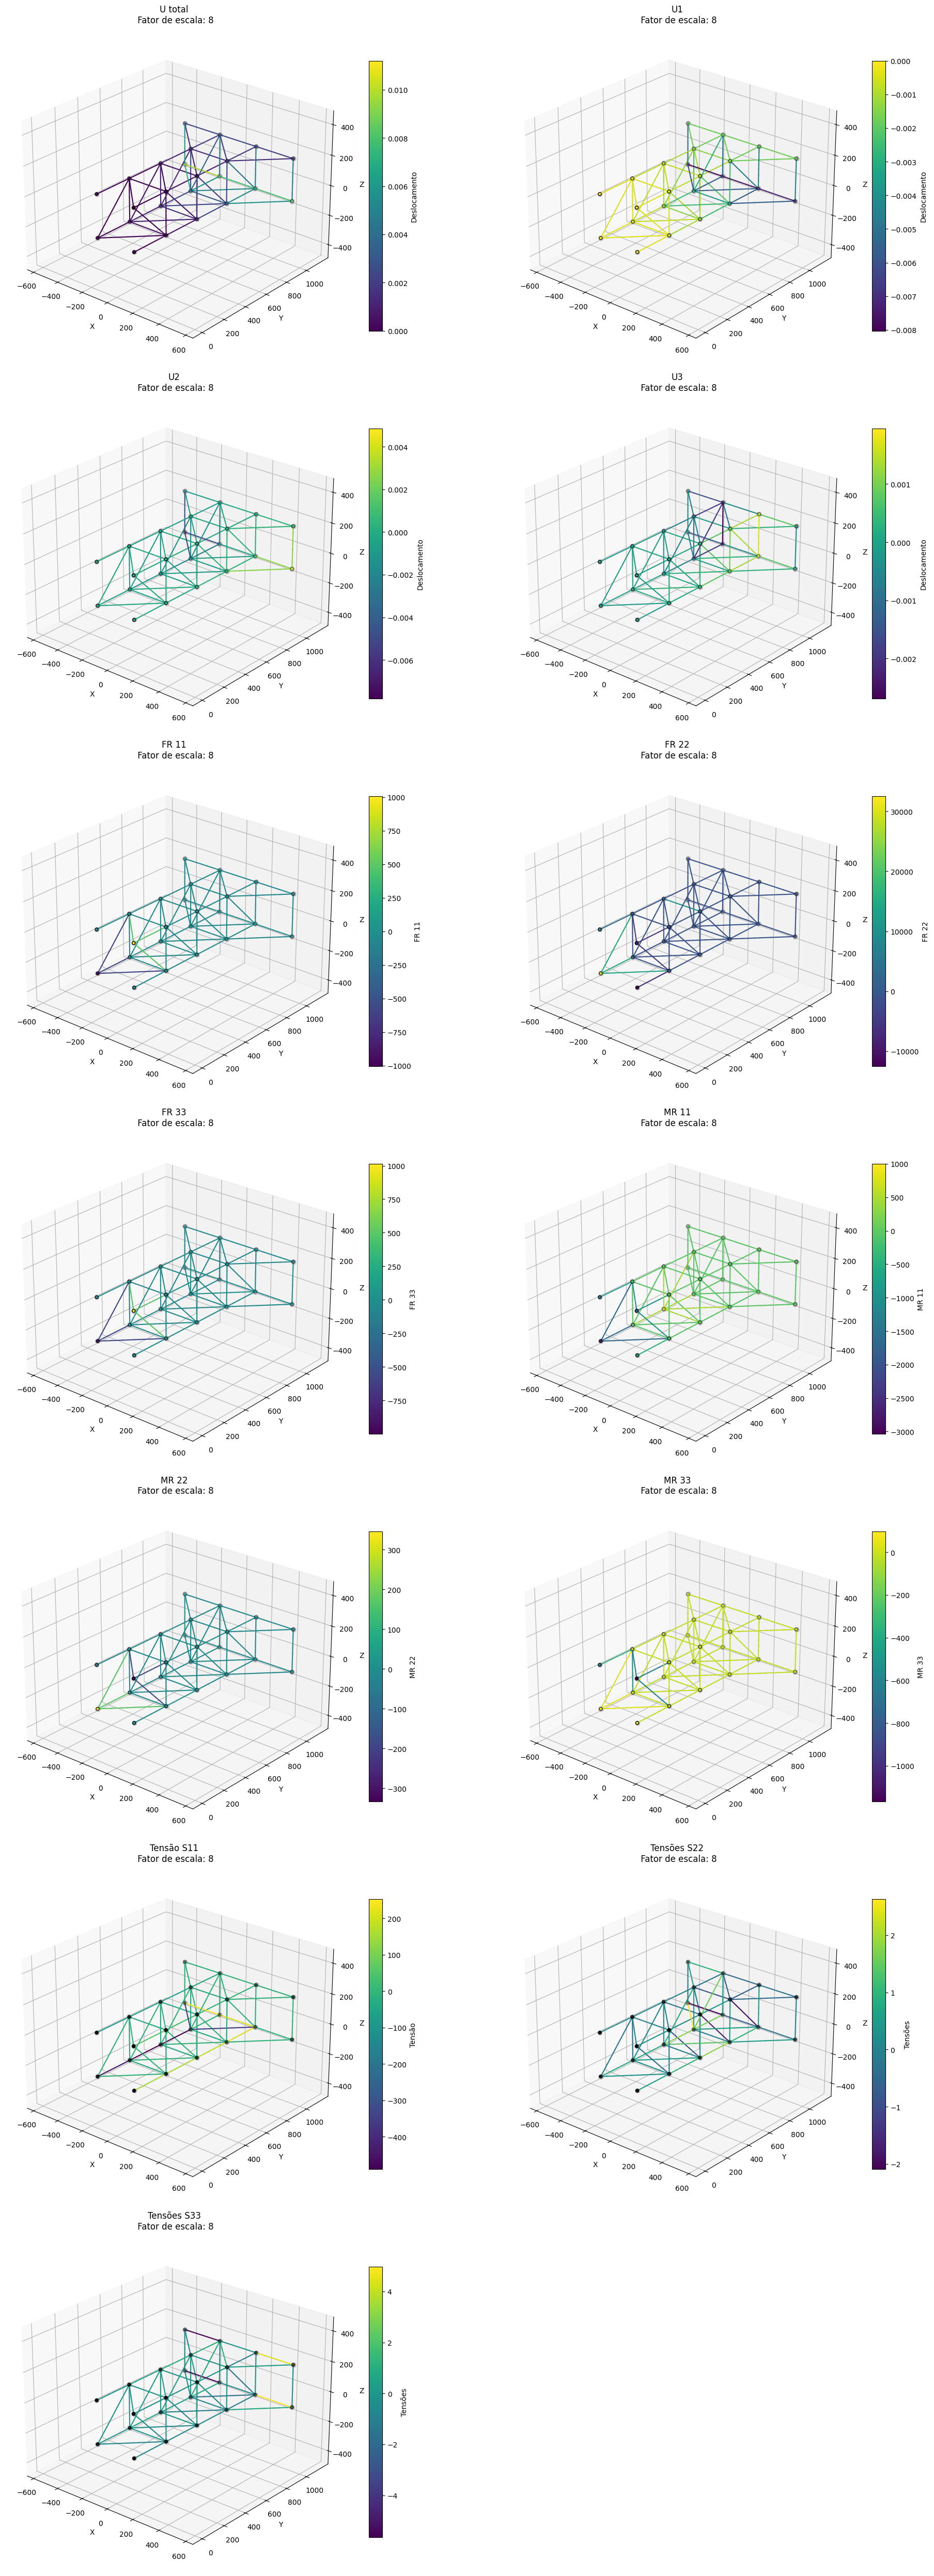

<Figure size 640x480 with 0 Axes>

In [359]:
num_cores = numero_de_nos
cores = cm.viridis(np.linspace(0, 1, num_cores))

fig = plt.figure(figsize=(20, 50))
ax1 = fig.add_subplot(721, projection='3d')
ax2 = fig.add_subplot(722, projection='3d')
ax3 = fig.add_subplot(723, projection='3d')
ax4 = fig.add_subplot(724, projection='3d')
ax5 = fig.add_subplot(725, projection='3d')
ax6 = fig.add_subplot(726, projection='3d')
ax7 = fig.add_subplot(727, projection='3d')
ax8 = fig.add_subplot(728, projection='3d')
ax9 = fig.add_subplot(729, projection='3d')
ax10 = fig.add_subplot(7,2,10, projection='3d')
ax11 = fig.add_subplot(7,2,11, projection='3d')
ax12 = fig.add_subplot(7,2,12, projection='3d')
ax13 = fig.add_subplot(7,2,13, projection='3d')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax1.plot(x,y,z, '--', c='#C1BEBF', marker='o')

min_deslocamento_global = min(U_global)
max_deslocamento_global = max(U_global)
intervalo_deslocamento_global = max_deslocamento_global - min_deslocamento_global

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    deslocamento_medio = (U_global[i-1] + U_global[j-1]) / 2

    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento_global) / intervalo_deslocamento_global
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    

    ax1.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

norm = plt.Normalize(min(U_global), max(U_global))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax1, shrink=0.8, label='Deslocamento')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]
  

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento_global) / intervalo_deslocamento_global * (num_cores - 1))] for d in U_global]

ax1.view_init(elev=25, azim=310)

ax1.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

ax1.set_title('U total\n Fator de escala: {}'.format(Fator_de_escala))
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')  
ax1.axis('equal')
ax1.grid()

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax2.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Ux)
    max_deslocamento = max(Ux)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Ux[i-1] + Ux[j-1]) / 2   
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax2.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])


x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Ux]

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax2, shrink=0.8, label='Deslocamento')

ax2.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

ax2.view_init(elev=25, azim=310)

ax2.set_title('U1\n Fator de escala: {}'.format(Fator_de_escala))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.axis('equal')
ax2.grid()  

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax3.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Uy)
    max_deslocamento = max(Uy)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Uy[i-1] + Uy[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax3.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Uy]

ax3.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax3, shrink=0.8, label='Deslocamento') 

ax3.view_init(elev=25, azim=310)

ax3.set_title('U2\n Fator de escala: {}'.format(Fator_de_escala))
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')  
ax3.axis('equal')
ax3.grid()  

####################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax4.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Uz)
    max_deslocamento = max(Uz)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Uz[i-1] + Uz[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax4.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Uz]

ax4.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax4, shrink=0.8, label='Deslocamento')  

ax4.set_title('U3\n Fator de escala: {}'.format(Fator_de_escala))
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')  
ax4.grid()  
ax4.axis('equal')

ax4.view_init(elev=25, azim=310)

#######################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax5.plot(x,y,z, '--', c='#C1BEBF', marker='o')

min_deslocamento_global = min(Fx_r)
max_deslocamento_global = max(Fx_r)
intervalo_deslocamento_global = max_deslocamento_global - min_deslocamento_global

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    deslocamento_medio = (Fx_r[i-1] + Fx_r[j-1]) / 2

    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento_global) / intervalo_deslocamento_global
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    

    ax5.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

norm = plt.Normalize(min(Fx_r), max(Fx_r))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax5, shrink=0.8, label='FR 11')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]
  

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento_global) / intervalo_deslocamento_global * (num_cores - 1))] for d in Fx_r]

ax5.view_init(elev=25, azim=310)

ax5.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

ax5.set_title('FR 11\n Fator de escala: {}'.format(Fator_de_escala))
ax5.set_xlabel('X')
ax5.set_ylabel('Y')
ax5.set_zlabel('Z')  
ax5.axis('equal')
ax5.grid()

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax6.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Fy_r)
    max_deslocamento = max(Fy_r)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Fy_r[i-1] + Fy_r[j-1]) / 2   
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax6.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])


x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Fy_r]

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax6, shrink=0.8, label='FR 22')

ax6.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

ax6.view_init(elev=25, azim=310)

ax6.set_title('FR 22\n Fator de escala: {}'.format(Fator_de_escala))
ax6.set_xlabel('X')
ax6.set_ylabel('Y')
ax6.set_zlabel('Z')
ax6.axis('equal')
ax6.grid()  

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax7.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Fz_r)
    max_deslocamento = max(Fz_r)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Fz_r[i-1] + Fz_r[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax7.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Fz_r]

ax7.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax7, shrink=0.8, label='FR 33') 

ax7.view_init(elev=25, azim=310)

ax7.set_title('FR 33\n Fator de escala: {}'.format(Fator_de_escala))
ax7.set_xlabel('X')
ax7.set_ylabel('Y')
ax7.set_zlabel('Z')  
ax7.axis('equal')
ax7.grid()  

####################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax8.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Mx_r)
    max_deslocamento = max(Mx_r)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Mx_r[i-1] + Mx_r[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax8.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Mx_r]

ax8.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax8, shrink=0.8, label='MR 11')  

ax8.set_title('MR 11\n Fator de escala: {}'.format(Fator_de_escala))
ax8.set_xlabel('X')
ax8.set_ylabel('Y')
ax8.set_zlabel('Z')  
ax8.grid()  
ax8.axis('equal')

ax8.view_init(elev=25, azim=310)

###########################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax9.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(My_r)
    max_deslocamento = max(My_r)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (My_r[i-1] + My_r[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax9.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in My_r]

ax9.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax9, shrink=0.8, label='MR 22')  

ax9.set_title('MR 22\n Fator de escala: {}'.format(Fator_de_escala))
ax9.set_xlabel('X')
ax9.set_ylabel('Y')
ax9.set_zlabel('Z')  
ax9.grid()  
ax9.axis('equal')

ax9.view_init(elev=25, azim=310)

############################################################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax10.plot(x,y,z, '--', c='#C1BEBF', marker='o')

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]
    
    min_deslocamento = min(Mz_r)
    max_deslocamento = max(Mz_r)
    intervalo_deslocamento = max_deslocamento - min_deslocamento

    deslocamento_medio = (Mz_r[i-1] + Mz_r[j-1]) / 2  
    
    if deslocamento_medio == 0:
        rel_pos_deslocamento = 0
        indice_cor_deslocamento = int(num_cores/2)
    else:
        rel_pos_deslocamento = (deslocamento_medio - min_deslocamento) / intervalo_deslocamento
        indice_cor_deslocamento = int(rel_pos_deslocamento * (num_cores - 1))
    
    ax10.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_deslocamento])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

if deslocamento_medio == 0:
    cores_pontos = [cores[int(num_cores/2)]]
else:
    cores_pontos = [cores[int((d - min_deslocamento) / intervalo_deslocamento * (num_cores - 1))] for d in Mz_r]

ax10.scatter(x_coords, y_coords, z_coords, c=cores_pontos, marker='o', edgecolors='black', zorder=10)

norm = plt.Normalize(min_deslocamento, max_deslocamento)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax10, shrink=0.8, label='MR 33')  

ax10.set_title('MR 33\n Fator de escala: {}'.format(Fator_de_escala))
ax10.set_xlabel('X')
ax10.set_ylabel('Y')
ax10.set_zlabel('Z')  
ax10.grid()  
ax10.axis('equal')

ax10.view_init(elev=25, azim=310)

##############################################################


for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax11.plot(x,y,z, '--', c='#C1BEBF', marker='o')

min_tensao_x = min(tensao_elementos_x)
max_tensao_x = max(tensao_elementos_x)
intervalo_tensao_x = max_tensao_x - min_tensao_x

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_x = tensao_elementos_x[k]

    if tensao_x == 0:
        rel_pos_tensao = 0
        indice_cor_tensao = int((num_cores/2)) 
    else:
        rel_pos_tensao = (tensao_x - min_tensao_x) / intervalo_tensao_x
        indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1)) 
    
    ax11.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_tensao])

norm = plt.Normalize(min(tensao_elementos_x), max(tensao_elementos_x))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax11, shrink=0.8, label='Tensão')

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

ax11.set_title('Tensão S11\n Fator de escala: {}'.format(Fator_de_escala))
ax11.set_xlabel('X')
ax11.set_ylabel('Y')
ax11.set_zlabel('Z') 
ax11.view_init(elev=25, azim=310)
ax11.grid()  
ax11.axis('equal')

ax11.scatter(x_coords, y_coords, z_coords, color='black', marker='o', zorder=10)

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax12.plot(x,y,z, '--', c='#C1BEBF', marker='o')

min_tensao_y = min(tensao_elementos_y)
max_tensao_y = max(tensao_elementos_y)
intervalo_tensao_y = max_tensao_y - min_tensao_y

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_y = tensao_elementos_y[k]

    if tensao_y == 0:
        rel_pos_tensao = 0
        indice_cor_tensao = int((num_cores/2)) 
    else:
        rel_pos_tensao = (tensao_y - min_tensao_y) / intervalo_tensao_y
        indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1)) 
    
    ax12.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_tensao])


x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

norm = plt.Normalize(min(tensao_elementos_y), max(tensao_elementos_y))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax12, shrink=0.8, label='Tensões')


ax12.set_title('Tensões S22\n Fator de escala: {}'.format(Fator_de_escala))
ax12.set_xlabel('X')
ax12.set_ylabel('Y')
ax12.set_zlabel('Z')
ax12.grid()  
ax12.axis('equal')

ax12.view_init(elev=25, azim=310)

ax12.scatter(x_coords, y_coords, z_coords, color='black', marker='o', zorder=10)

#####################################################################

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    x,y,z = [],[],[]

    x.append(matriz_de_coordenadas[i-1][0])
    x.append(matriz_de_coordenadas[j-1][0])
    y.append(matriz_de_coordenadas[i-1][1])
    y.append(matriz_de_coordenadas[j-1][1])
    z.append(matriz_de_coordenadas[i-1][2])
    z.append(matriz_de_coordenadas[j-1][2])
    
    ax13.plot(x,y,z, '--', c='#C1BEBF', marker='o')

min_tensao_z = min(tensao_elementos_z)
max_tensao_z = max(tensao_elementos_z)
intervalo_tensao_z = max_tensao_z - min_tensao_z

for k in range(numero_de_elementos):
    i = matriz_de_compatibilidade[k][0]
    j = matriz_de_compatibilidade[k][1]

    tensao_z = tensao_elementos_z[k]

    if tensao_z == 0:
        rel_pos_tensao = 0
        indice_cor_tensao = int((num_cores/2)) 
    else:
        rel_pos_tensao = (tensao_z - min_tensao_z) / intervalo_tensao_z
        indice_cor_tensao = int(rel_pos_tensao * (num_cores - 1)) 
    
    ax13.plot([matriz_de_coordenadas_finais_em_escala[i-1][0], matriz_de_coordenadas_finais_em_escala[j-1][0]],
             [matriz_de_coordenadas_finais_em_escala[i-1][1], matriz_de_coordenadas_finais_em_escala[j-1][1]],
             [matriz_de_coordenadas_finais_em_escala[i-1][2], matriz_de_coordenadas_finais_em_escala[j-1][2]],
             color=cores[indice_cor_tensao])

x_coords = [coord[0] for coord in matriz_de_coordenadas_finais_em_escala]
y_coords = [coord[1] for coord in matriz_de_coordenadas_finais_em_escala]
z_coords = [coord[2] for coord in matriz_de_coordenadas_finais_em_escala]

norm = plt.Normalize(min(tensao_elementos_z), max(tensao_elementos_z))
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])  
cbar = fig.colorbar(sm, ax=ax13, shrink=0.8, label='Tensões')

ax13.set_title('Tensões S33\n Fator de escala: {}'.format(Fator_de_escala))
ax13.set_xlabel('X')
ax13.set_ylabel('Y')
ax13.set_zlabel('Z')  
ax13.grid()  

ax13.scatter(x_coords, y_coords, z_coords, color='black', marker='o', zorder=10)

ax13.view_init(elev=25, azim=310)
ax13.axis('equal')

plt.tight_layout()

plt.show()


plt.tight_layout()

plt.show()


In [360]:
print(f"{"\033[1m\033[91m"}{'Resultados da análise utilizando elementos de pórtico:'}{"\033[0m"}")

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for i in range(numero_de_nos):
    print("\nDeslocamento do nó {} na direção X: {}".format(i+1,U[graus_de_liberdade_por_nó*i]))
    print("Deslocamento do nó {} na direção Y: {}".format(i+1,U[graus_de_liberdade_por_nó*i+1]))
    print("Deslocamento do nó {} na direção Z: {}".format(i+2,U[graus_de_liberdade_por_nó*i+2]))
    print("\nPosição inicial do nó: X = {}, Y = {}, Z = {}".format(matriz_de_coordenadas[i][0],matriz_de_coordenadas[i][1], matriz_de_coordenadas[i][2]))
    print("Posição final do nó: X = {}, Y = {}, Z = {}".format(matriz_de_coordenadas_finais[i][0], matriz_de_coordenadas_finais[i][1], matriz_de_coordenadas_finais[i][2]))
    print("\nRotação do nó {} na direção X: {}".format(i+1,U[graus_de_liberdade_por_nó*i+3]))
    print("Rotação do nó {} na direção Y: {}".format(i+1,U[graus_de_liberdade_por_nó*i+4]))
    print("Rotação do nó {} na direção Z: {}".format(i+1,U[graus_de_liberdade_por_nó*i+5]))
    print("\nForça do nó {} na direção X: {}".format(i+1,F[graus_de_liberdade_por_nó*i]))
    print("Força do nó {} na direção Y: {}".format(i+1,F[graus_de_liberdade_por_nó*i+1]))
    print("Força do nó {} na direção Z: {}".format(i+1,F[graus_de_liberdade_por_nó*i+2]))
    print("\nMomento do nó {} na direção X: {}".format(i+1,F[graus_de_liberdade_por_nó*i+3]))
    print("Momento do nó {} na direção Y: {}".format(i+1,F[graus_de_liberdade_por_nó*i+4]))
    print("Momento do nó {} na direção Z: {}".format(i+1,F[graus_de_liberdade_por_nó*i+5]))
    print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

""" for j in range(numero_de_elementos):
    print("\nDeformação no elemento {}: {}".format(j+1, elongamento[j]))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")

for j in range(numero_de_elementos):
    print("\nTensão no elemento {}: {}".format(j+1, tensao_elementos[j])) """

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")
    
print('\nA matriz de rigidez do sistema é: \n \n {} \n'.format(matriz_de_rigidez_global_sistema))

print(f"{"\033[1m\033[34m"}{'_'*80}{"\033[0m"}")



Resultados da análise utilizando elementos de pórtico:
________________________________________________________________________________

Deslocamento do nó 1 na direção X: -0.003240413983808617
Deslocamento do nó 1 na direção Y: 0.0007922893226859827
Deslocamento do nó 2 na direção Z: 0.0010610279800400324

Posição inicial do nó: X = 142.5, Y = 855.0, Z = -142.5
Posição final do nó: X = 142.4967595860162, Y = 855.0007922893227, Z = -142.49893897201997

Rotação do nó 1 na direção X: 2.481707385390937e-06
Rotação do nó 1 na direção Y: 7.797038930591923e-07
Rotação do nó 1 na direção Z: 1.0710316625014087e-05

Força do nó 1 na direção X: -2.1827872842550278e-11
Força do nó 1 na direção Y: 5.093170329928398e-11
Força do nó 1 na direção Z: -3.637978807091713e-12

Momento do nó 1 na direção X: -7.275957614183426e-12
Momento do nó 1 na direção Y: 1.7053025658242404e-12
Momento do nó 1 na direção Z: 0.0
________________________________________________________________________________

Deslocame

In [361]:
#%reset -f